## Funciones de distribución de probabilidades

### Distribución Uniforme

In [1]:
## se caracteriza por generar numeros aleatorios, todos tienen la misma probabilidad

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
a = 1
b = 100
n = 1000000 ## numero de muestras
data = np.random.uniform(a, b, n)

(array([ 99708.,  99952., 100073.,  99795., 100047., 100623.,  99978.,
        100166.,  99500., 100158.]),
 array([ 1.00001487, 10.89995977, 20.79990467, 30.69984958, 40.59979448,
        50.49973938, 60.39968429, 70.29962919, 80.19957409, 90.099519  ,
        99.9994639 ]),
 <a list of 10 Patch objects>)

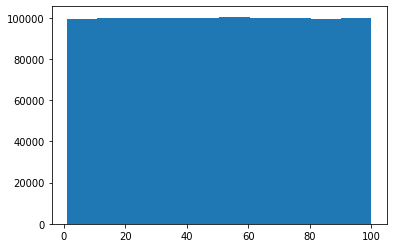

In [5]:
%matplotlib inline
plt.hist(data)

## Distribucion Normal

In [6]:
data = np.random.randn(1000000)

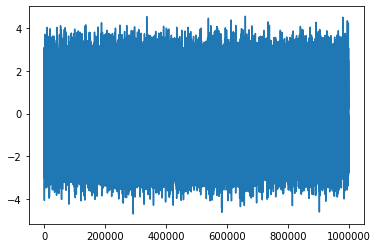

In [8]:
x = range(1,1000001)
plt.plot(x, data)

(array([9.10000e+01, 2.20300e+03, 2.53250e+04, 1.32616e+05, 3.11117e+05,
        3.31596e+05, 1.59385e+05, 3.41560e+04, 3.35700e+03, 1.54000e+02]),
 array([-4.69041351, -3.76669512, -2.84297673, -1.91925834, -0.99553996,
        -0.07182157,  0.85189682,  1.77561521,  2.6993336 ,  3.62305198,
         4.54677037]),
 <a list of 10 Patch objects>)

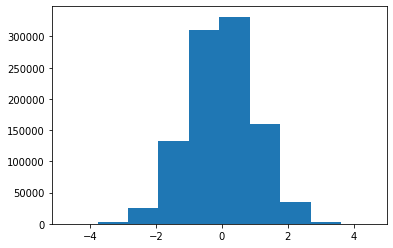

In [9]:
%matplotlib inline
plt.hist(data)

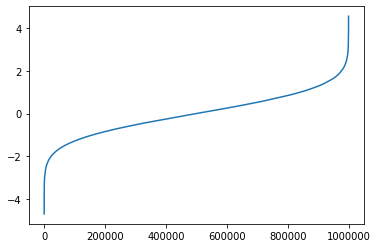

In [10]:
plt.plot(x,sorted(data))

(array([   7.,   55.,  360., 1258., 2629., 2869., 1972.,  709.,  126.,
          15.]),
 array([-4.56609244, -2.64206753, -0.71804262,  1.20598228,  3.13000719,
         5.05403209,  6.978057  ,  8.90208191, 10.82610681, 12.75013172,
        14.67415663]),
 <a list of 10 Patch objects>)

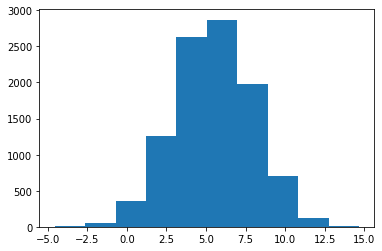

In [11]:
## si se quiere obetenr una distribucion normal con media y desvicacion distinta a 0 y 1
mu = 5.5
sd = 2.5
Z_10000 = np.random.randn(10000)
data = mu + sd * Z_10000 # Z = (X - mu) / sd -> N(0,1), X = mu + sd * Z
plt.hist(data)

In [12]:
data = np.random.randn(2,4)
data

array([[-0.94955046,  0.91082338, -0.42871001, -0.23496719],
       [-0.6578019 , -1.97336203,  1.89055496, -0.36069571]])

## La simulación de Monte Carlo

* Generamos dos números aleatorios uniforme x e y entre 0 y 1 en total 1000 veces.
* Calcularemos $z = x^2 + y^2$:
      * Si z< 1 -> estamos dentro del círculo.
      * Si z >= 1 -> estamos fuera del círculo.
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de π.
* Repetimos el experimento un número suficiente de veces (por ejemplo 100), para obtener (100) diferentes aproximaciones de π.
* Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de π.



In [13]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.140684


(3.140684, [<matplotlib.lines.Line2D at 0x99f0dc8>])

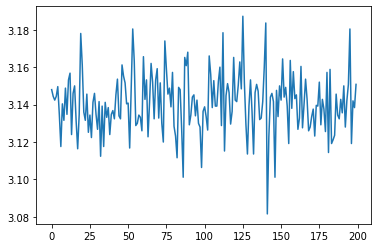

In [14]:
pi_montecarlo(10000, 200)